In [8]:
pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
# print(abalone.metadata)

# variable information
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [10]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [11]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [12]:
# Data handling and processing
import pandas as pd
import numpy as np
from pandas import DataFrame
from numpy import loadtxt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Model selection and evaluation
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score

# Data fetching
from ucimlrepo import fetch_ucirepo

# Serialization
import joblib

In [13]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")

abalone = pd.read_csv(target_url,header=None) # Remove the prefix argument
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight',
                   'Viscera weight', 'Shell weight', 'Rings'] # Set column names explicitly
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


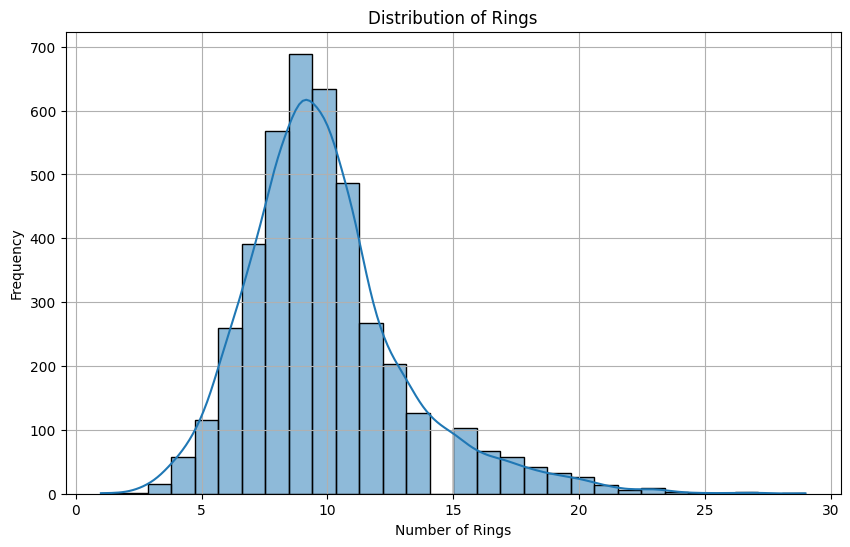

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(abalone['Rings'], kde=True, bins=30)
plt.title('Distribution of Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:
print(y.shape)
print(X.shape)

(4177, 1)
(4177, 8)


In [16]:
df = pd.DataFrame(X)


In [20]:
# Assuming 'abalone' is your original DataFrame containing 'Rings'
X = abalone.drop('Rings', axis=1)  # Features
y = abalone['Rings']  # Target variable
df = pd.DataFrame(X)
print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64


In [21]:
abalone.isnull().sum(axis = 0) # if there are null values
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


Features in Descending Order of Importance ['Shell weight', 'Diameter', 'Height', 'Length', 'Whole weight', 'Viscera weight', 'Shucked weight']


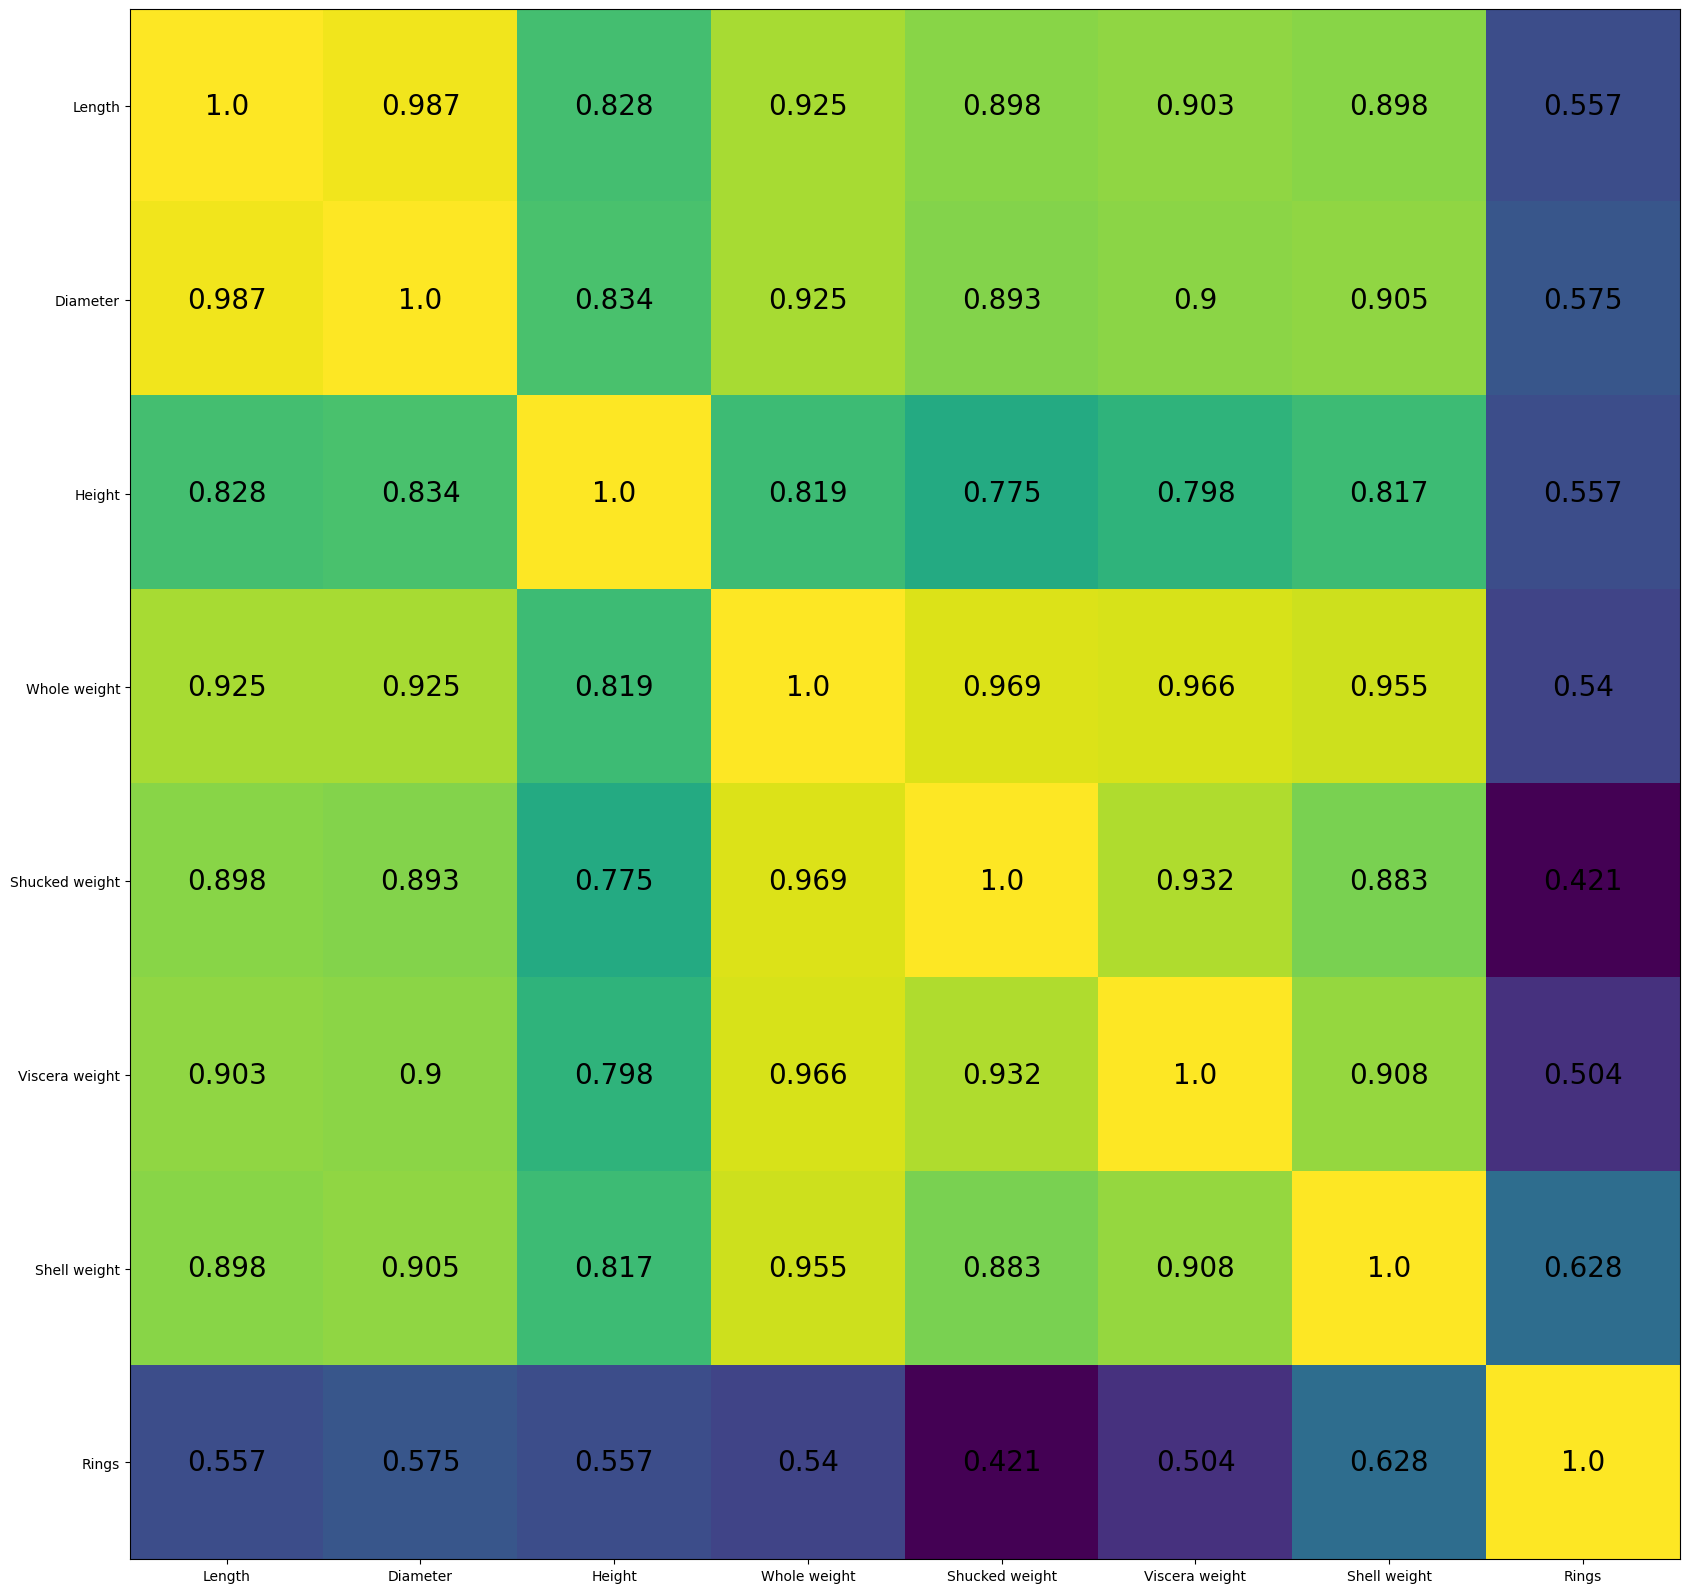

In [26]:
#Corrleation Map
corMat = DataFrame(abalone.iloc[:,:8].corr()).values
corMat = np.around(corMat, decimals = 3)

feature_importance = DataFrame(abalone.iloc[:,:8].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of Importance', list(feature_importance.index))

columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
fig, ax = plot.subplots(figsize = (20,60))
im = ax.imshow(corMat)

ax.set_xticks(range(len(corMat)))
ax.set_yticks(range(len(corMat)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

for i in range(8):
    for j in range(8):
        text = ax.text(j, i, corMat[i, j],
                       ha="center", va="center", color="black", size = "20")

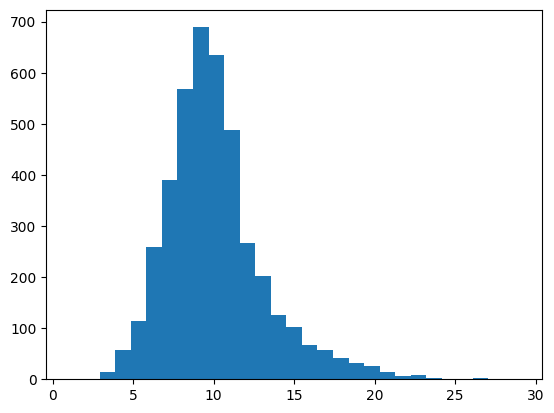

In [22]:
n, bins, patches = plot.hist(abalone['Rings'], bins = 29)
y = abalone["Rings"]
X = abalone.drop(columns = "Rings")

In [23]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
#Testing model for best MSE
models = {
    "Linear Regression": LinearRegression(),
    "LASSO Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Elastic Net": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

cv = KFold(n_splits=5, random_state=20, shuffle=True)

# Evaluate models with both MSE and R^2 metrics
results = {}
for name, model in models.items():
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}

df_results = pd.DataFrame.from_dict(results, orient='index')
df_results_sorted = df_results.sort_values('MSE')
print(df_results_sorted)

                              MSE       R^2
Gradient Boosting        4.611765  0.544920
Ridge Regression         4.660313  0.540129
Linear Regression        4.720033  0.534236
Random Forest            4.791540  0.527180
Support Vector Machine   5.261191  0.480835
K-Nearest Neighbors      5.275930  0.479381
XGBoost                  5.331183  0.473929
AdaBoost                 7.201246  0.289394
Logistic Regression      7.472865  0.262592
Decision Tree            8.972067  0.114653
Elastic Net              9.191917  0.092959
LASSO Regression        10.136819 -0.000282


In [27]:
# Hyperparameter tuning for the best parameters
param_grids = {
    "Gradient Boosting": {
        'n_estimators': [100, 300],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    "Random Forest": {
        'n_estimators': [100, 300],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Ridge Regression": {
        'alpha': [0.1, 1.0, 10.0]
    }
}

models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge()
}

cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform GridSearchCV for each model
best_estimators = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated MSE for {model_name}: {grid_search.best_score_}")

test_results = {}
for model_name, model in best_estimators.items():
    y_pred_test = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_results[model_name] = test_mse
    print(f"Test MSE for {model_name}: {test_mse}")

print(test_results)

Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best cross-validated MSE for Gradient Boosting: -4.655689946102218
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best cross-validated MSE for Random Forest: -4.630731441597862
Tuning hyperparameters for Ridge Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Ridge Regression: {'alpha': 0.1}
Best cross-validated MSE for Ridge Regression: -4.856319655417165
Test MSE for Gradient Boosting: 4.887300314352163
Test MSE for Random Forest: 4.836690121125919
Test MSE for Ridge Regression: 5.1811198967092995
{'Gradient Boosting': 4.887300314352163, 'Ran

In [32]:
# Train and evaluate models using GridSearchCV
results = []
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((model_name, grid_search.best_params_, mse, r2, best_model, y_pred))


# Display the results
for result in results:
    print(f"Model: {result[0]}")
    print(f"Best Parameters: {result[1]}")
    print(f"Test MSE: {result[2]}")
    print(f"Test R^2: {result[3]}")
    print()


Training Gradient Boosting...
Training Random Forest...
Training Ridge Regression...
Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Test MSE: 4.887300314352163
Test R^2: 0.5463958788200879

Model: Random Forest
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Test MSE: 4.836690121125919
Test R^2: 0.5510931535412095

Model: Ridge Regression
Best Parameters: {'alpha': 0.1}
Test MSE: 5.1811198967092995
Test R^2: 0.5191256550015984



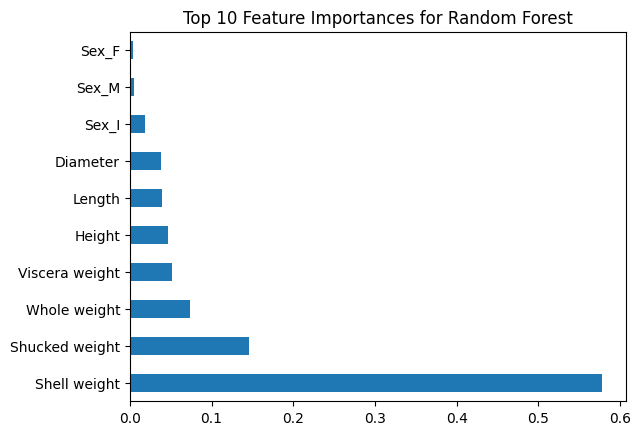

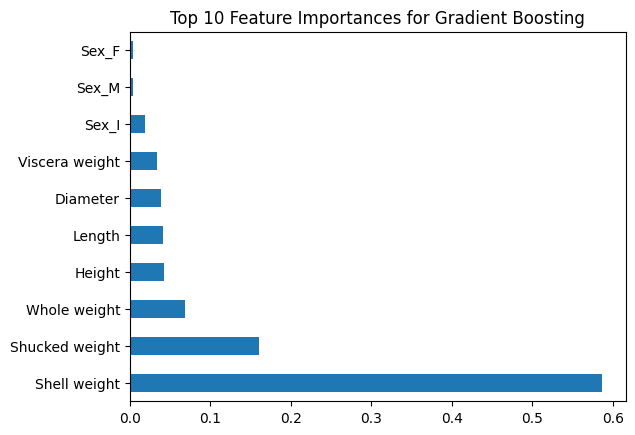

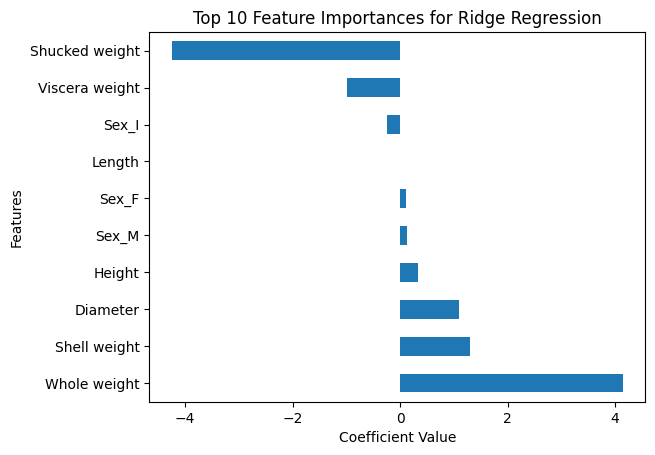

In [30]:
# Plot feature importances
if 'Random Forest' in best_estimators:
    rf_model = best_estimators['Random Forest']
    rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
    rf_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances for Random Forest')
    plt.show()

if 'Gradient Boosting' in best_estimators:
    gb_model = best_estimators['Gradient Boosting']
    gb_importances = pd.Series(gb_model.feature_importances_, index=X_train.columns)
    gb_importances.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances for Gradient Boosting')
    plt.show()

if 'Ridge Regression' in best_estimators:
    ridge_model = best_estimators['Ridge Regression']
    ridge_coef = pd.Series(ridge_model.coef_, index=X_train.columns)
    ridge_coef.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Feature Importances for Ridge Regression')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.show()




Cross-validated MSE for Gradient Boosting:
Mean MSE: 4.655689946102218
Standard Deviation of MSE: 0.49697263773230005


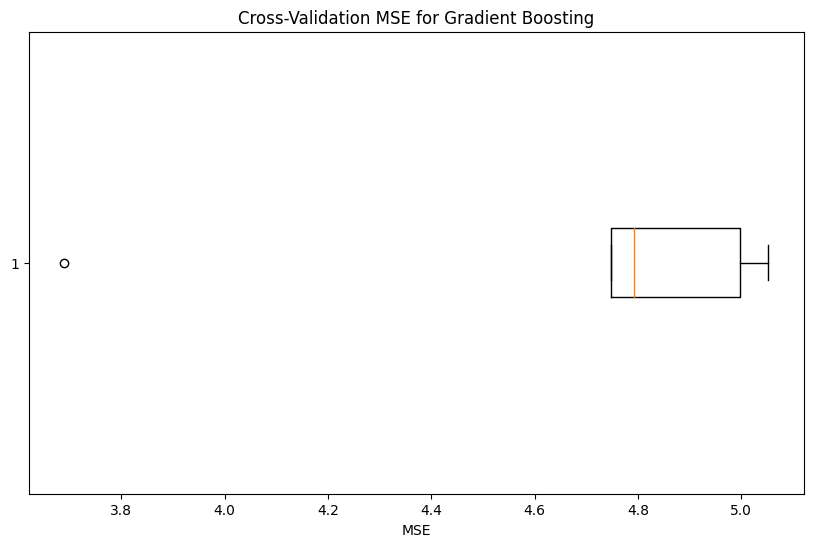

Cross-validated MSE for Random Forest:
Mean MSE: 4.630731441597862
Standard Deviation of MSE: 0.45625839037747


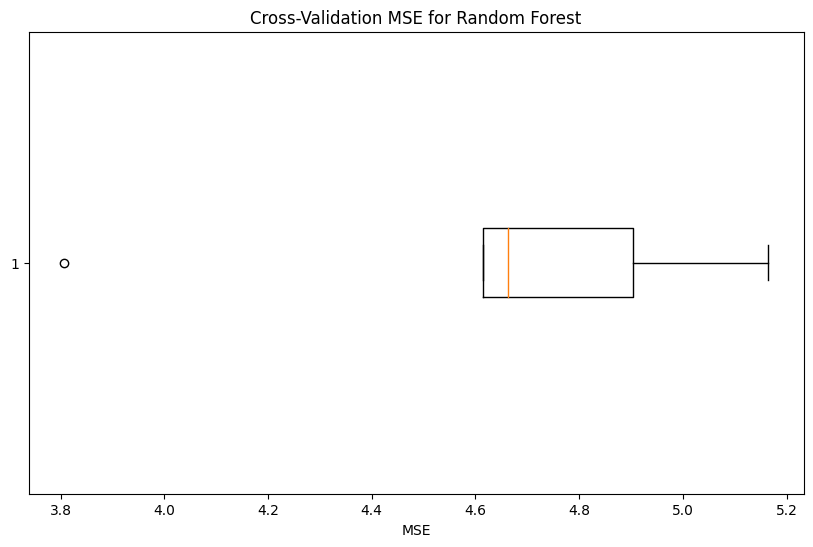

Cross-validated MSE for Ridge Regression:
Mean MSE: 4.856319655417165
Standard Deviation of MSE: 0.751015984191516


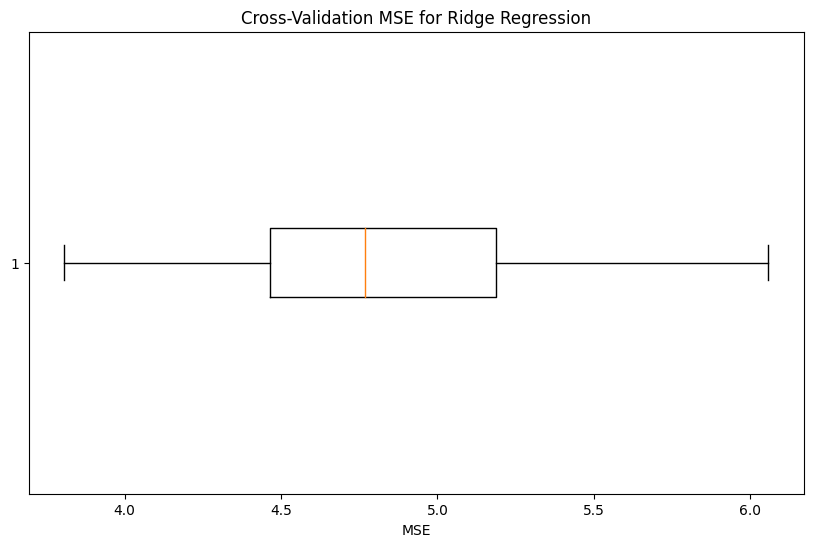

In [34]:
# Perform cross-validation on all the best models
from sklearn.model_selection import cross_val_score
cv_results = {}
for model_name, model in best_estimators.items():

    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)


    cv_mse_scores = -cv_scores
    mean_cv_mse = cv_mse_scores.mean()
    std_cv_mse = cv_mse_scores.std()

    cv_results[model_name] = {
        'mean_mse': mean_cv_mse,
        'std_mse': std_cv_mse,
        'cv_scores': cv_mse_scores
    }

    print(f"Cross-validated MSE for {model_name}:")
    print(f"Mean MSE: {mean_cv_mse}")
    print(f"Standard Deviation of MSE: {std_cv_mse}")

    # Plot the cross-validation results
    plt.figure(figsize=(10, 6))
    plt.boxplot(cv_mse_scores, vert=False)
    plt.title(f'Cross-Validation MSE for {model_name}')
    plt.xlabel('MSE')
    plt.show()



Cross-validated MSE for the best model (Random Forest):
Mean MSE: 4.630731441597862
Standard Deviation of MSE: 0.45625839037747


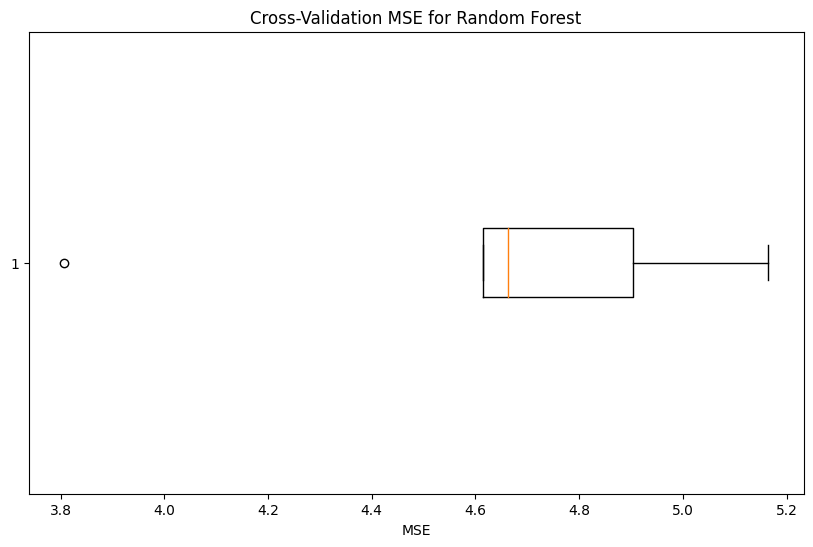

In [35]:
# Perform cross-validation on the best model
from sklearn.model_selection import cross_val_score

best_model_name = min(test_results, key=test_results.get)
best_model = best_estimators[best_model_name]

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)

cv_mse_scores = -cv_scores
mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

print(f"Cross-validated MSE for the best model ({best_model_name}):")
print(f"Mean MSE: {mean_cv_mse}")
print(f"Standard Deviation of MSE: {std_cv_mse}")

plt.figure(figsize=(10, 6))
plt.boxplot(cv_mse_scores, vert=False)
plt.title(f'Cross-Validation MSE for {best_model_name}')
plt.xlabel('MSE')
plt.show()

In [ ]:
import time

X = abalone.drop(columns=['Rings'])
y = abalone['Rings']

# LinearRegression model
model = LinearRegression()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
start_time = time.time() # Now time.time() will work

y_true, y_pred = [], []

for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    prediction = model.predict(X_test)

    y_true.append(y_test)
    y_pred.append(prediction[0])

# Elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Calculate performance metrics
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Elapsed time for LOOCV with LinearRegression: {elapsed_time:.2f} seconds")

results = pd.DataFrame({'True Values': y_true, 'Predicted Values': y_pred})
results.to_csv('loo_cv_predictions_linear_regression_abalone.csv', index=False)
print("Predictions saved to 'loo_cv_predictions_linear_regression_abalone.csv'")

#Plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(y_true, y_true, gridsize=30, cmap='cividis', mincnt=1, edgecolors='w', linewidths=0.5)
plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted Values', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (LOOCV with Linear Regression)')
plt.legend()
plt.colorbar(hb, label='Density of True Values')
plt.grid(True)
plt.show()


Mean Squared Error: 69.45741550904019
Predictions saved to 'loo_cv_predictions_ridge_synthetic.csv'


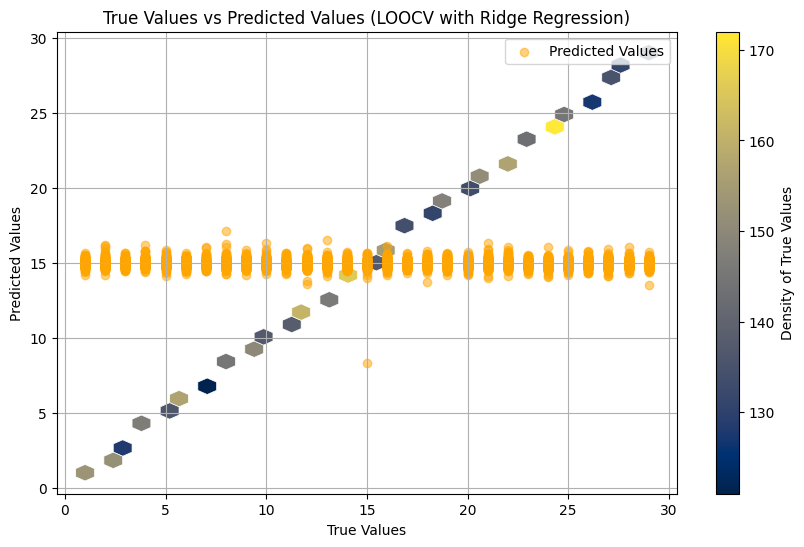

In [89]:
X = abalone.drop(columns=['Rings'])
y = abalone['Rings']

# Ridge model
model = Ridge(alpha=1.0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV
start_time = time.time()

model = Ridge(alpha=1.0)
y_true, y_pred = [], []
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_synthetic[train_index], y_synthetic[test_index]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(prediction[0])


mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")

results = pd.DataFrame({'True Values': y_true, 'Predicted Values': y_pred})
results.to_csv('loo_cv_predictions_ridge_synthetic.csv', index=False)
print("Predictions saved to 'loo_cv_predictions_ridge_synthetic.csv'")

# Plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(y_true, y_true, gridsize=30, cmap='cividis', mincnt=1, edgecolors='w', linewidths=0.5)
plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted Values', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (LOOCV with Ridge Regression)')
plt.legend()
plt.colorbar(hb, label='Density of True Values')
plt.grid(True)
plt.show()




Mean Squared Error: 95.47771293818579
Predictions saved to 'loo_cv_predictions_gb_synthetic.csv'


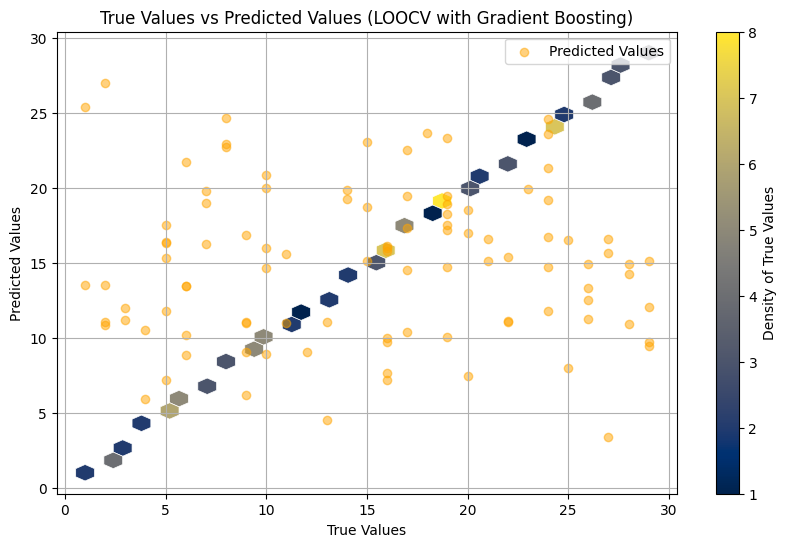

In [90]:
# Reduce the sample size
abalone_reduced = abalone.sample(n=100, random_state=0)
X = abalone_reduced.drop(columns=['Rings'])
y = abalone_reduced['Rings']

# GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Measure the time taken to perform LOOCV
start_time = time.time()

y_true, y_pred = [], []
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_synthetic[train_index], y_synthetic[test_index]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(prediction[0])


mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")

results = pd.DataFrame({'True Values': y_true, 'Predicted Values': y_pred})
results.to_csv('loo_cv_predictions_gb_synthetic.csv', index=False)
print("Predictions saved to 'loo_cv_predictions_gb_synthetic.csv'")


# Plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(y_true, y_true, gridsize=30, cmap='cividis', mincnt=1, edgecolors='w', linewidths=0.5)
plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted Values', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (LOOCV with Gradient Boosting)')
plt.legend()
plt.colorbar(hb, label='Density of True Values')
plt.grid(True)
plt.show()



Mean Squared Error: 4.598448000000001
Elapsed time for LOOCV with RandomForestRegressor: 21.58 seconds
Predictions saved to 'loo_cv_predictions_rf_reduced.csv'


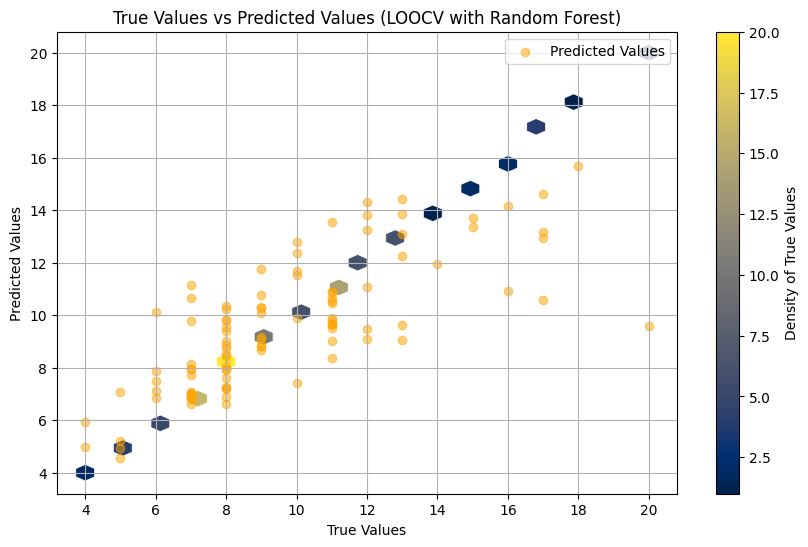

In [91]:
abalone_reduced = abalone.sample(n=100, random_state=0)  # Reduce to 100 samples

X = abalone_reduced.drop(columns=['Rings'])
y = abalone_reduced['Rings']

# Reset the index of y to match the reduced DataFrame
y = y.reset_index(drop=True)  # This line is added

# Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Measure the time taken to perform LOOCV
start_time = time.time()
y_true, y_pred = [], []
for train_index, test_index in loo.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    y_true.append(y_test)
    y_pred.append(prediction[0])

end_time = time.time()
elapsed_time = end_time - start_time

mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Elapsed time for LOOCV with RandomForestRegressor: {elapsed_time:.2f} seconds")

results = pd.DataFrame({'True Values': y_true, 'Predicted Values': y_pred})
results.to_csv('loo_cv_predictions_rf_reduced.csv', index=False)
print("Predictions saved to 'loo_cv_predictions_rf_reduced.csv'")

# Plot
plt.figure(figsize=(10, 6))
hb = plt.hexbin(y_true, y_true, gridsize=30, cmap='cividis', mincnt=1, edgecolors='w', linewidths=0.5)
plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted Values', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values (LOOCV with Random Forest)')
plt.legend()
plt.colorbar(hb, label='Density of True Values')
plt.grid(True)
plt.show()